In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('BankChurners.csv', delimiter=",") #abrindo o arquivo
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
for column in df.columns:
    df = df[df[column] != "Unknown"]

/home/rafael/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/rafael/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/rafael/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/rafael/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/rafael/.local/lib/python3.8/site-packages/pandas/core/

In [4]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [6]:
le = preprocessing.LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = le.fit_transform(df[column])
        
print(df)

       CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               1            45       1                3   
1      818770008               1            49       0                5   
2      713982108               1            51       1                3   
4      709106358               1            40       1                3   
5      713061558               1            44       1                2   
...          ...             ...           ...     ...              ...   
10120  710841183               1            54       1                1   
10121  713899383               1            56       0                1   
10122  772366833               1            50       1                2   
10124  716506083               0            44       0                1   
10126  714337233               0            43       0                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                    3   

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') #mapa de correlação

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.041033,0.015073,0.004835,-0.010983,-0.018134,-0.002670,-0.021619,-0.002142,0.139073,0.004544,0.013938,0.012772,-0.000262,0.003121,-0.000540,0.012720,-0.025341,-0.006345,-0.002785,0.007992
Attrition_Flag,0.041033,1.000000,-0.008735,0.035358,-0.011423,0.008224,-0.016325,-0.017429,-0.004156,-0.009249,0.145713,-0.152732,-0.193923,0.015815,0.265380,-0.007802,0.132702,0.160378,0.357261,0.280460,0.183984
Customer_Age,0.015073,-0.008735,1.000000,-0.010569,-0.128232,-0.000887,0.005496,-0.017700,-0.003836,0.791271,-0.022067,0.057870,-0.023971,0.024563,0.016325,0.023097,-0.068976,-0.045859,-0.069883,-0.017599,0.001296
Gender,0.004835,0.035358,-0.010569,1.000000,0.008121,0.008215,-0.010088,-0.475945,0.085587,-0.003813,-0.004505,-0.011282,0.045244,0.476471,0.020816,0.474351,0.034839,0.034648,-0.055468,-0.007336,-0.309002
Dependent_count,-0.010983,-0.011423,-0.128232,0.008121,1.000000,-0.009621,-0.031529,-0.036916,0.031646,-0.112368,-0.043257,-0.022804,-0.055625,0.081379,-0.003832,0.081674,-0.033320,0.023236,0.057056,0.019081,-0.042485
Education_Level,-0.018134,0.008224,-0.000887,0.008215,-0.009621,1.000000,0.000447,-0.005703,-0.004166,-0.007646,0.015659,-0.003747,0.026043,0.007328,0.019120,0.005623,0.007929,0.019210,0.007358,0.005209,0.009256
Marital_Status,-0.002670,-0.016325,0.005496,-0.010088,-0.031529,0.000447,1.000000,0.012008,0.032600,0.005707,-0.025284,0.010982,0.001001,0.027833,-0.041719,0.031529,-0.039418,0.037065,0.076978,0.001436,-0.027698
Income_Category,-0.021619,-0.017429,-0.017700,-0.475945,-0.036916,-0.005703,0.012008,1.000000,-0.051509,-0.011691,0.018517,0.032919,-0.012879,-0.287802,-0.019529,-0.285903,-0.010054,-0.009633,0.027489,0.015182,0.183112
Card_Category,-0.002142,-0.004156,-0.003836,0.085587,0.031646,-0.004166,0.032600,-0.051509,1.000000,-0.006893,-0.061966,-0.006166,0.002414,0.465318,0.010737,0.464100,-0.010698,0.164605,0.112994,-0.004011,-0.208147
Months_on_book,0.139073,-0.009249,0.791271,-0.003813,-0.112368,-0.007646,0.005707,-0.011691,-0.006893,1.000000,-0.016751,0.071305,-0.011054,0.020103,0.007884,0.019391,-0.059865,-0.037625,-0.050445,-0.028528,-0.010007


In [8]:
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

PCA(n_components=21)

In [9]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

                               PC0       PC1       PC2       PC3       PC4  \
CLIENTNUM                -0.001932  0.022517  0.125075  0.049483  0.039884   
Attrition_Flag           -0.013041 -0.380857  0.115098  0.313717  0.048524   
Customer_Age              0.001189  0.160796  0.654943 -0.004348  0.069065   
Gender                    0.338878  0.084652 -0.021719  0.271362 -0.106174   
Dependent_count           0.061460 -0.063160 -0.172507 -0.032161 -0.091661   
Education_Level           0.002829 -0.013162 -0.003860  0.027228 -0.038121   
Marital_Status            0.029486 -0.024112  0.024729 -0.118545  0.040396   
Income_Category          -0.246093 -0.068279 -0.001616 -0.241836  0.145888   
Card_Category             0.294607 -0.058097  0.024385 -0.023497 -0.084645   
Months_on_book            0.002748  0.160401  0.661966 -0.010214  0.080338   
Total_Relationship_Count -0.102507  0.167006 -0.079224  0.369871  0.093332   
Months_Inactive_12_mon   -0.015343  0.118463  0.066531 -0.106269

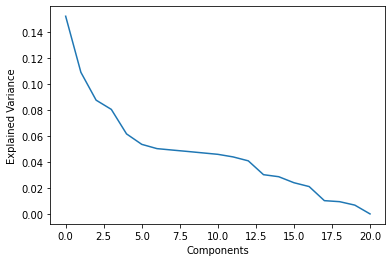

In [10]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

<AxesSubplot:>

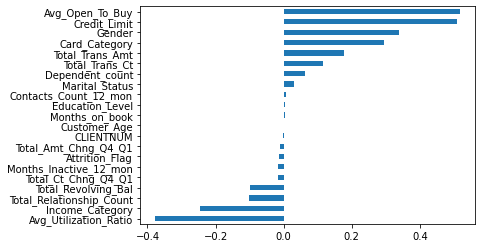

In [11]:
loadings["PC0"].sort_values().plot.barh()

In [12]:
pca.components_

array([[-1.93184856e-03, -1.30414132e-02,  1.18876385e-03,
         3.38878014e-01,  6.14596090e-02,  2.82873328e-03,
         2.94863153e-02, -2.46093288e-01,  2.94607063e-01,
         2.74784784e-03, -1.02506836e-01, -1.53425756e-02,
         6.40603488e-03,  5.08192598e-01, -9.96346450e-02,
         5.16769777e-01, -1.04951792e-02,  1.76896686e-01,
         1.14431245e-01, -1.65000777e-02, -3.77064646e-01],
       [ 2.25167085e-02, -3.80856666e-01,  1.60796414e-01,
         8.46515713e-02, -6.31600522e-02, -1.31619452e-02,
        -2.41124870e-02, -6.82787937e-02, -5.80974810e-02,
         1.60400570e-01,  1.67005543e-01,  1.18462603e-01,
         2.18461731e-01,  1.42835539e-02, -2.49528715e-01,
         3.64736482e-02, -1.53380741e-01, -4.75473034e-01,
        -5.23919983e-01, -2.55479494e-01, -2.00248482e-01],
       [ 1.25075034e-01,  1.15098239e-01,  6.54942898e-01,
        -2.17190755e-02, -1.72506558e-01, -3.85977231e-03,
         2.47285020e-02, -1.61618823e-03,  2.43845939e

In [13]:
pca = PCA(n_components = 2, copy = True) #executando o PCA
X = pca.fit_transform(df_normalized)

In [16]:
pca.components_

array([[-0.00192584, -0.01304136,  0.0011883 ,  0.33887792,  0.06145949,
         0.00282799,  0.02948106, -0.24609346,  0.29460738,  0.00274841,
        -0.10250829, -0.01534708,  0.0064135 ,  0.50819216, -0.09963446,
         0.51676932, -0.01049431,  0.17689801,  0.11443214, -0.01650081,
        -0.37706449],
       [ 0.02272006, -0.3808667 ,  0.16078122,  0.08464953, -0.06316601,
        -0.01318593, -0.02428863, -0.06828928, -0.05809052,  0.16042011,
         0.16696697,  0.11831016,  0.21870527,  0.01427073, -0.24951684,
         0.03645978, -0.15335192, -0.4754242 , -0.5238894 , -0.25550337,
        -0.20023979]])

In [17]:
df_normalized

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.806282,0.431820,-0.167598,0.954231,0.512674,0.285464,-0.542267,-0.431920,-0.259500,0.377207,...,-1.349213,0.493742,0.460026,-0.480726,0.502532,2.574252,-0.937101,-0.945147,3.827061,-0.794001
1,2.162084,0.431820,0.329839,-1.047816,2.061082,-0.388326,1.071770,1.014144,-0.259500,1.002003,...,-1.349213,-0.411303,-0.025945,-0.373625,0.007308,3.497442,-0.894719,-1.323150,12.578891,-0.636143
2,-0.681361,0.431820,0.578557,0.954231,0.512674,-0.388326,-0.542267,0.291112,-0.259500,0.002329,...,-1.349213,-2.221393,-0.556074,-1.437251,-0.427903,8.216470,-0.722885,-1.869155,6.793215,-1.012849
4,-0.813666,0.431820,-0.789394,0.954231,0.512674,1.633042,-0.542267,-0.431920,-0.259500,-1.872059,...,-1.349213,-2.221393,-0.413844,-1.437251,-0.285753,6.338718,-1.031668,-1.533152,7.492858,-1.012849
5,-0.706340,0.431820,-0.291957,0.954231,-0.261530,-0.388326,-0.542267,-1.154952,-0.259500,0.002329,...,-1.349213,-0.411303,-0.491205,0.097866,-0.499635,2.757993,-0.953247,-1.701153,0.563454,0.102920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,-0.766591,0.431820,0.951635,0.954231,-1.035734,0.285464,1.071770,-0.431920,-0.259500,-0.247589,...,-0.344293,-2.221393,0.596886,1.159030,0.493442,-0.450767,3.224110,2.078878,0.178021,-0.471109
10121,-0.683606,0.431820,1.200353,-1.047816,-1.035734,-0.388326,1.071770,1.014144,-0.259500,1.751759,...,-1.349213,1.398788,-0.526489,-0.691236,-0.464699,-0.854102,2.941275,2.330880,0.333032,-0.424469
10122,0.902923,0.431820,0.454198,0.954231,-0.261530,-0.388326,1.071770,-1.154952,-0.259500,0.502166,...,-0.344293,0.493742,-0.491972,0.841420,-0.566548,-0.258062,3.194990,2.204879,0.609538,0.644660
10124,-0.612872,-2.315454,-0.291957,-1.047816,-1.035734,0.285464,-0.542267,1.014144,-0.259500,0.002329,...,0.660628,1.398788,-0.337908,-1.437251,-0.209859,0.261793,1.700091,-0.189141,0.446148,-1.012849
